In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce

In [67]:
#!pip install category_encoders

In [68]:
df= pd.read_excel('3.xlsx')

In [69]:
df.head(31)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan
0,2022-07-17,21396.0,21209.8,21654.4,21091.8,159.23,Naik
1,2022-07-16,21209.9,20825.2,21561.3,20484.4,136.89,Naik
2,2022-07-15,20825.1,20586.1,21178.1,20393.4,164.67,Naik
3,2022-07-14,20586.0,20250.0,20862.2,19664.9,205.28,Naik
4,2022-07-13,20250.0,19133.6,20250.8,18942.2,249.38,Naik
5,2022-07-12,19330.9,19963.2,20051.7,19279.6,167.91,Turun
6,2022-07-11,19963.2,20847.2,20885.0,19897.0,160.20,Turun
7,2022-07-10,20847.4,21587.4,21559.2,20689.7,204.68,Turun
8,2022-07-09,21587.5,21610.4,21994.1,21338.4,190.11,Turun
9,2022-07-08,21611.2,21637.1,22482.1,21207.0,439.90,Turun


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Tanggal    31 non-null     datetime64[ns]
 1   Terakhir   31 non-null     float64       
 2   Pembukaan  31 non-null     float64       
 3   Tertinggi  31 non-null     float64       
 4   Terendah   31 non-null     float64       
 5   Vol        31 non-null     float64       
 6   Perubahan  31 non-null     object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.8+ KB


In [72]:
df_features = df.drop(['Tanggal', 'Perubahan'], axis=1)
df_target = df['Perubahan']

In [73]:
cols = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol']
df_features[cols] = df_features[cols].astype('category')

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Terakhir   31 non-null     category
 1   Pembukaan  31 non-null     category
 2   Tertinggi  31 non-null     category
 3   Terendah   31 non-null     category
 4   Vol        31 non-null     category
dtypes: category(5)
memory usage: 6.7 KB


In [74]:
for col in cols:
    df_features[col] = df_features[col].cat.codes
df_features.head(10)

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol
0,26,25,25,27,20
1,24,21,24,21,17
2,20,18,16,20,22
3,17,11,12,11,27
4,11,1,4,4,28
5,4,6,2,8,23
6,6,22,14,15,21
7,21,28,23,23,26
8,27,29,29,29,25
9,28,30,30,28,30


In [75]:
scale = StandardScaler().fit(df_features).transform(df_features.astype(float))
# scale = StandardScaler().fit_transform(df_features)
cols = list(df_features.columns)

df_features_scale = pd.DataFrame(scale, columns=cols)
df_features_scale.head()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol
0,1.229837,1.118034,1.118034,1.341641,0.559017
1,1.006231,0.670820,1.006231,0.670820,0.223607
2,0.559017,0.335410,0.111803,0.559017,0.782624
3,0.223607,-0.447214,-0.335410,-0.447214,1.341641
4,-0.447214,-1.565248,-1.229837,-1.229837,1.453444


In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scale, df_target, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (24, 5) (24,)
Test set: (7, 5) (7,)


In [77]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [78]:
y_pred = dt.predict(X_test) #prediksi model yang sudah dibuat sebelum nya dengan menggunakan method predict() 
y_pred[0:5]

array(['Turun', 'Naik', 'Turun', 'Naik', 'Naik'], dtype=object)

In [79]:
y_test[0:5]

20    Turun
7     Turun
5     Turun
2      Naik
3      Naik
Name: Perubahan, dtype: object

In [80]:
from sklearn.metrics import accuracy_score
print('Akurasi Train set: ', accuracy_score(y_train, dt.predict(X_train)))
print('Akurasi Test set: ', accuracy_score(y_test, y_pred))

Akurasi Train set:  0.9166666666666666
Akurasi Test set:  0.5714285714285714


In [85]:
dt.score(X_test, y_test)

0.5714285714285714

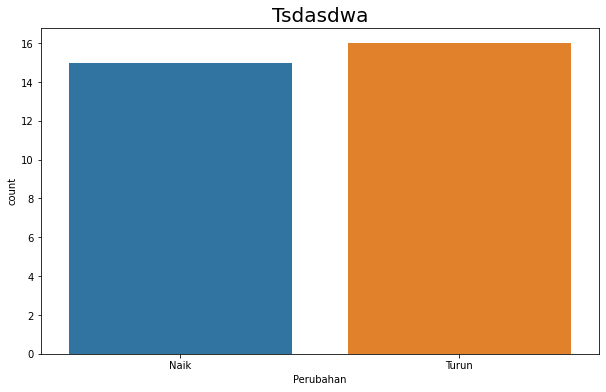

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Perubahan")
plt.title("Tsdasdwa", fontsize=20)
plt.show()

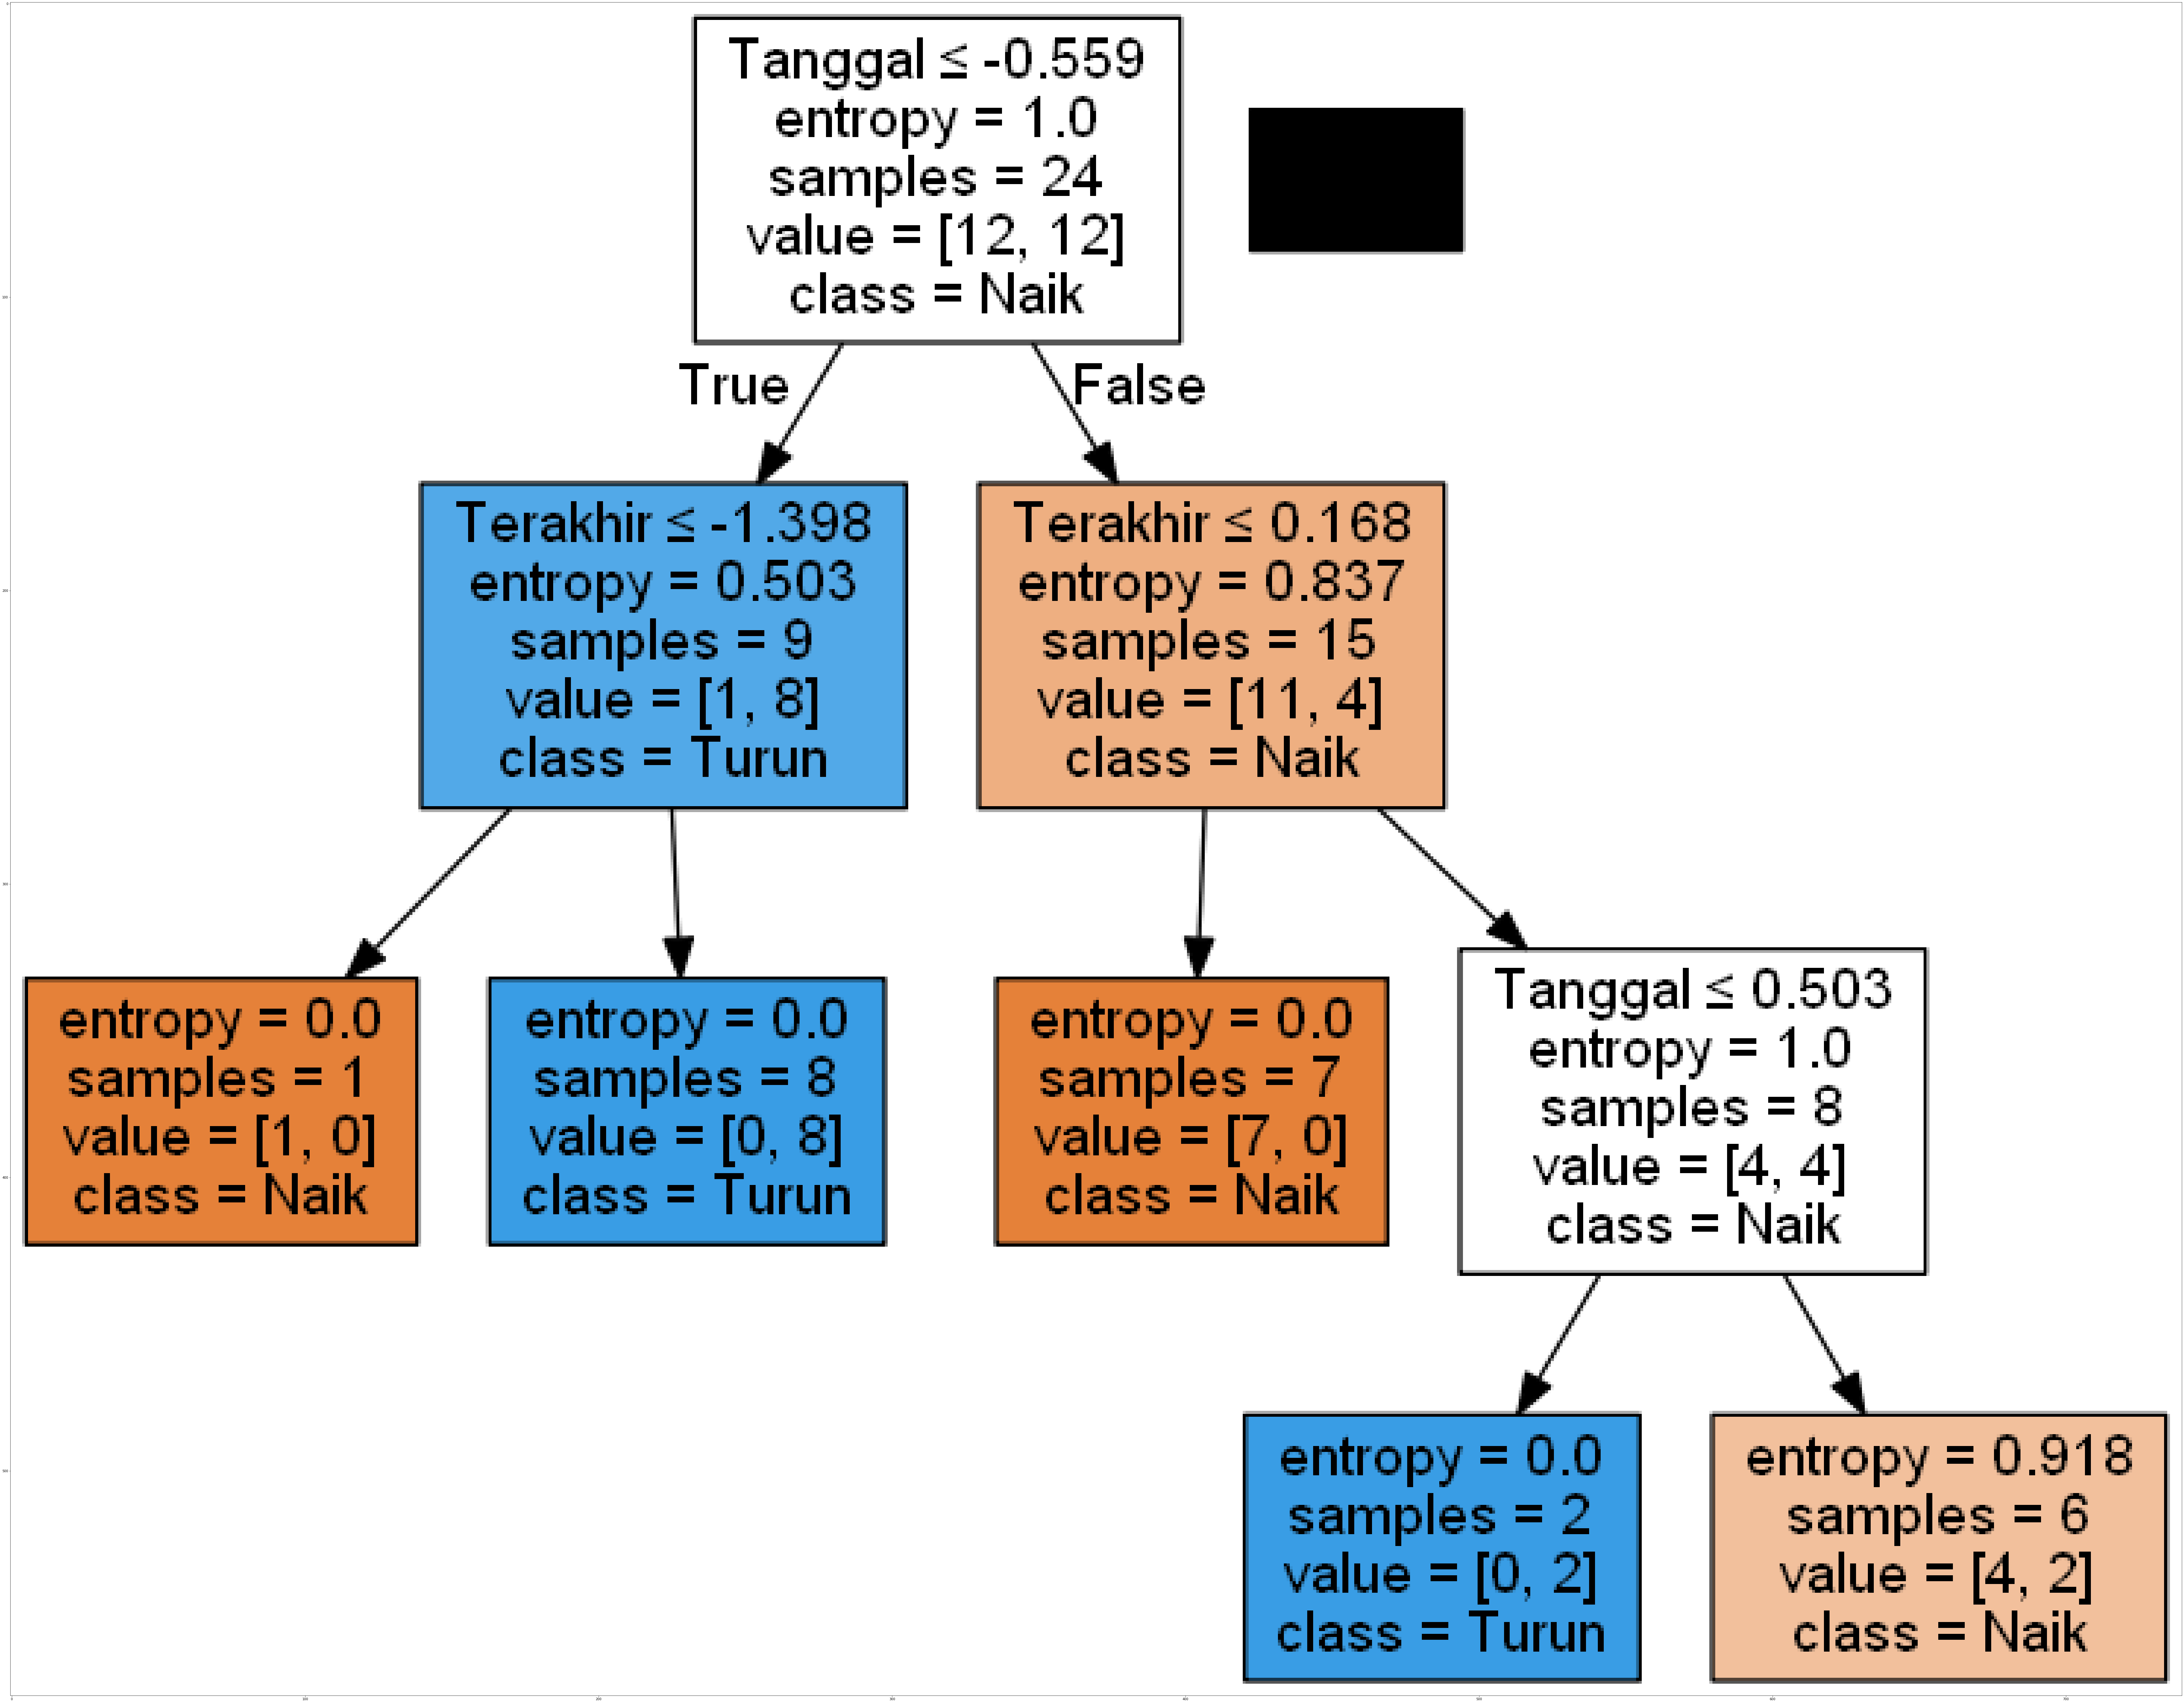

In [83]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree\

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


%matplotlib inline

dot_data = StringIO()
filename = 'teuing_tree.png'
featuresNames = df.columns[0:5]
targetNames = df['Perubahan'].unique().tolist()

out = tree.export_graphviz(dt, feature_names=featuresNames, out_file=dot_data, class_names=np.unique(y_train), 
                           filled=True, special_characters=True, rotate=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(200, 100))
plt.imshow(img, interpolation='nearest')